In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [26]:
import pandas as pd
import zipfile
import numpy as np

# Path to ZIP file
zip_path = "archive (1).zip"

# File names inside the ZIP
train_file = "fashion-mnist_train.csv"
test_file = "fashion-mnist_test.csv"

# Load CSV files from ZIP
with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open(train_file) as f:
        df_train = pd.read_csv(f)

    with z.open(test_file) as f:
        df_test = pd.read_csv(f)

# Extract labels and images
y_train = df_train.iloc[:, 0].values  # Labels (first column)
X_train = df_train.iloc[:, 1:].values  # Pixel values (remaining 784 columns)

y_test = df_test.iloc[:, 0].values
X_test = df_test.iloc[:, 1:].values

# Normalize pixel values (optional, improves model performance)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Print shape to confirm flattening
print("Training Data Shape:", X_train.shape)  # (60000, 784)
print("Test Data Shape:", X_test.shape)      # (10000, 784)


Training Data Shape: (60000, 784)
Test Data Shape: (10000, 784)


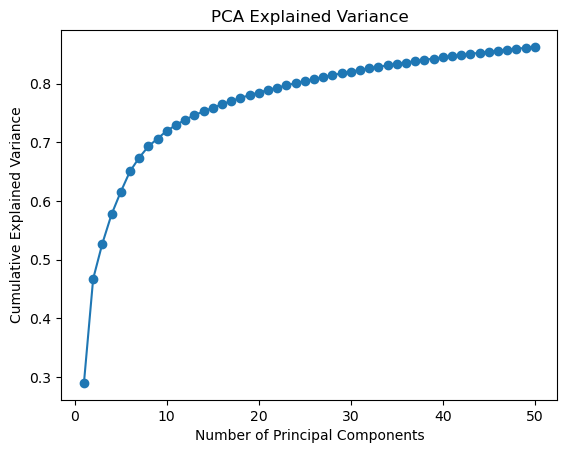

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, 51), explained_variance_ratio, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.show()

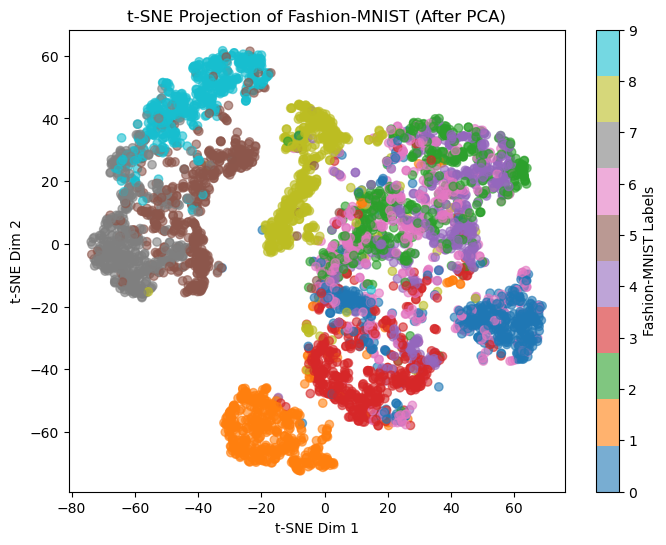

In [28]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_pca[:5000])

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train[:5000], cmap="tab10", alpha=0.6)
plt.colorbar(scatter, ticks=range(10), label="Fashion-MNIST Labels")
plt.title("t-SNE Projection of Fashion-MNIST (After PCA)")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.show()